In [9]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# ANIMALS
ANIMAL_IDS = ["R010", "R011", "R012"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [11]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-10-13 16:43:53,036][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 16 sessions for R010 between 2023-09-23 and 2023-10-13
fetched 16 sessions for R011 between 2023-09-23 and 2023-10-13
fetched 16 sessions for R012 between 2023-09-23 and 2023-10-13


In [12]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R012-_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2023-09-23 -> 2023-10-09
Returning appended df with entries between 2023-09-23 and 2023-10-13
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R012-_days_df.csv


c:\Users\JB\github\jbreda_animal_training\code\training_performance\plot_days_info.py:958: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


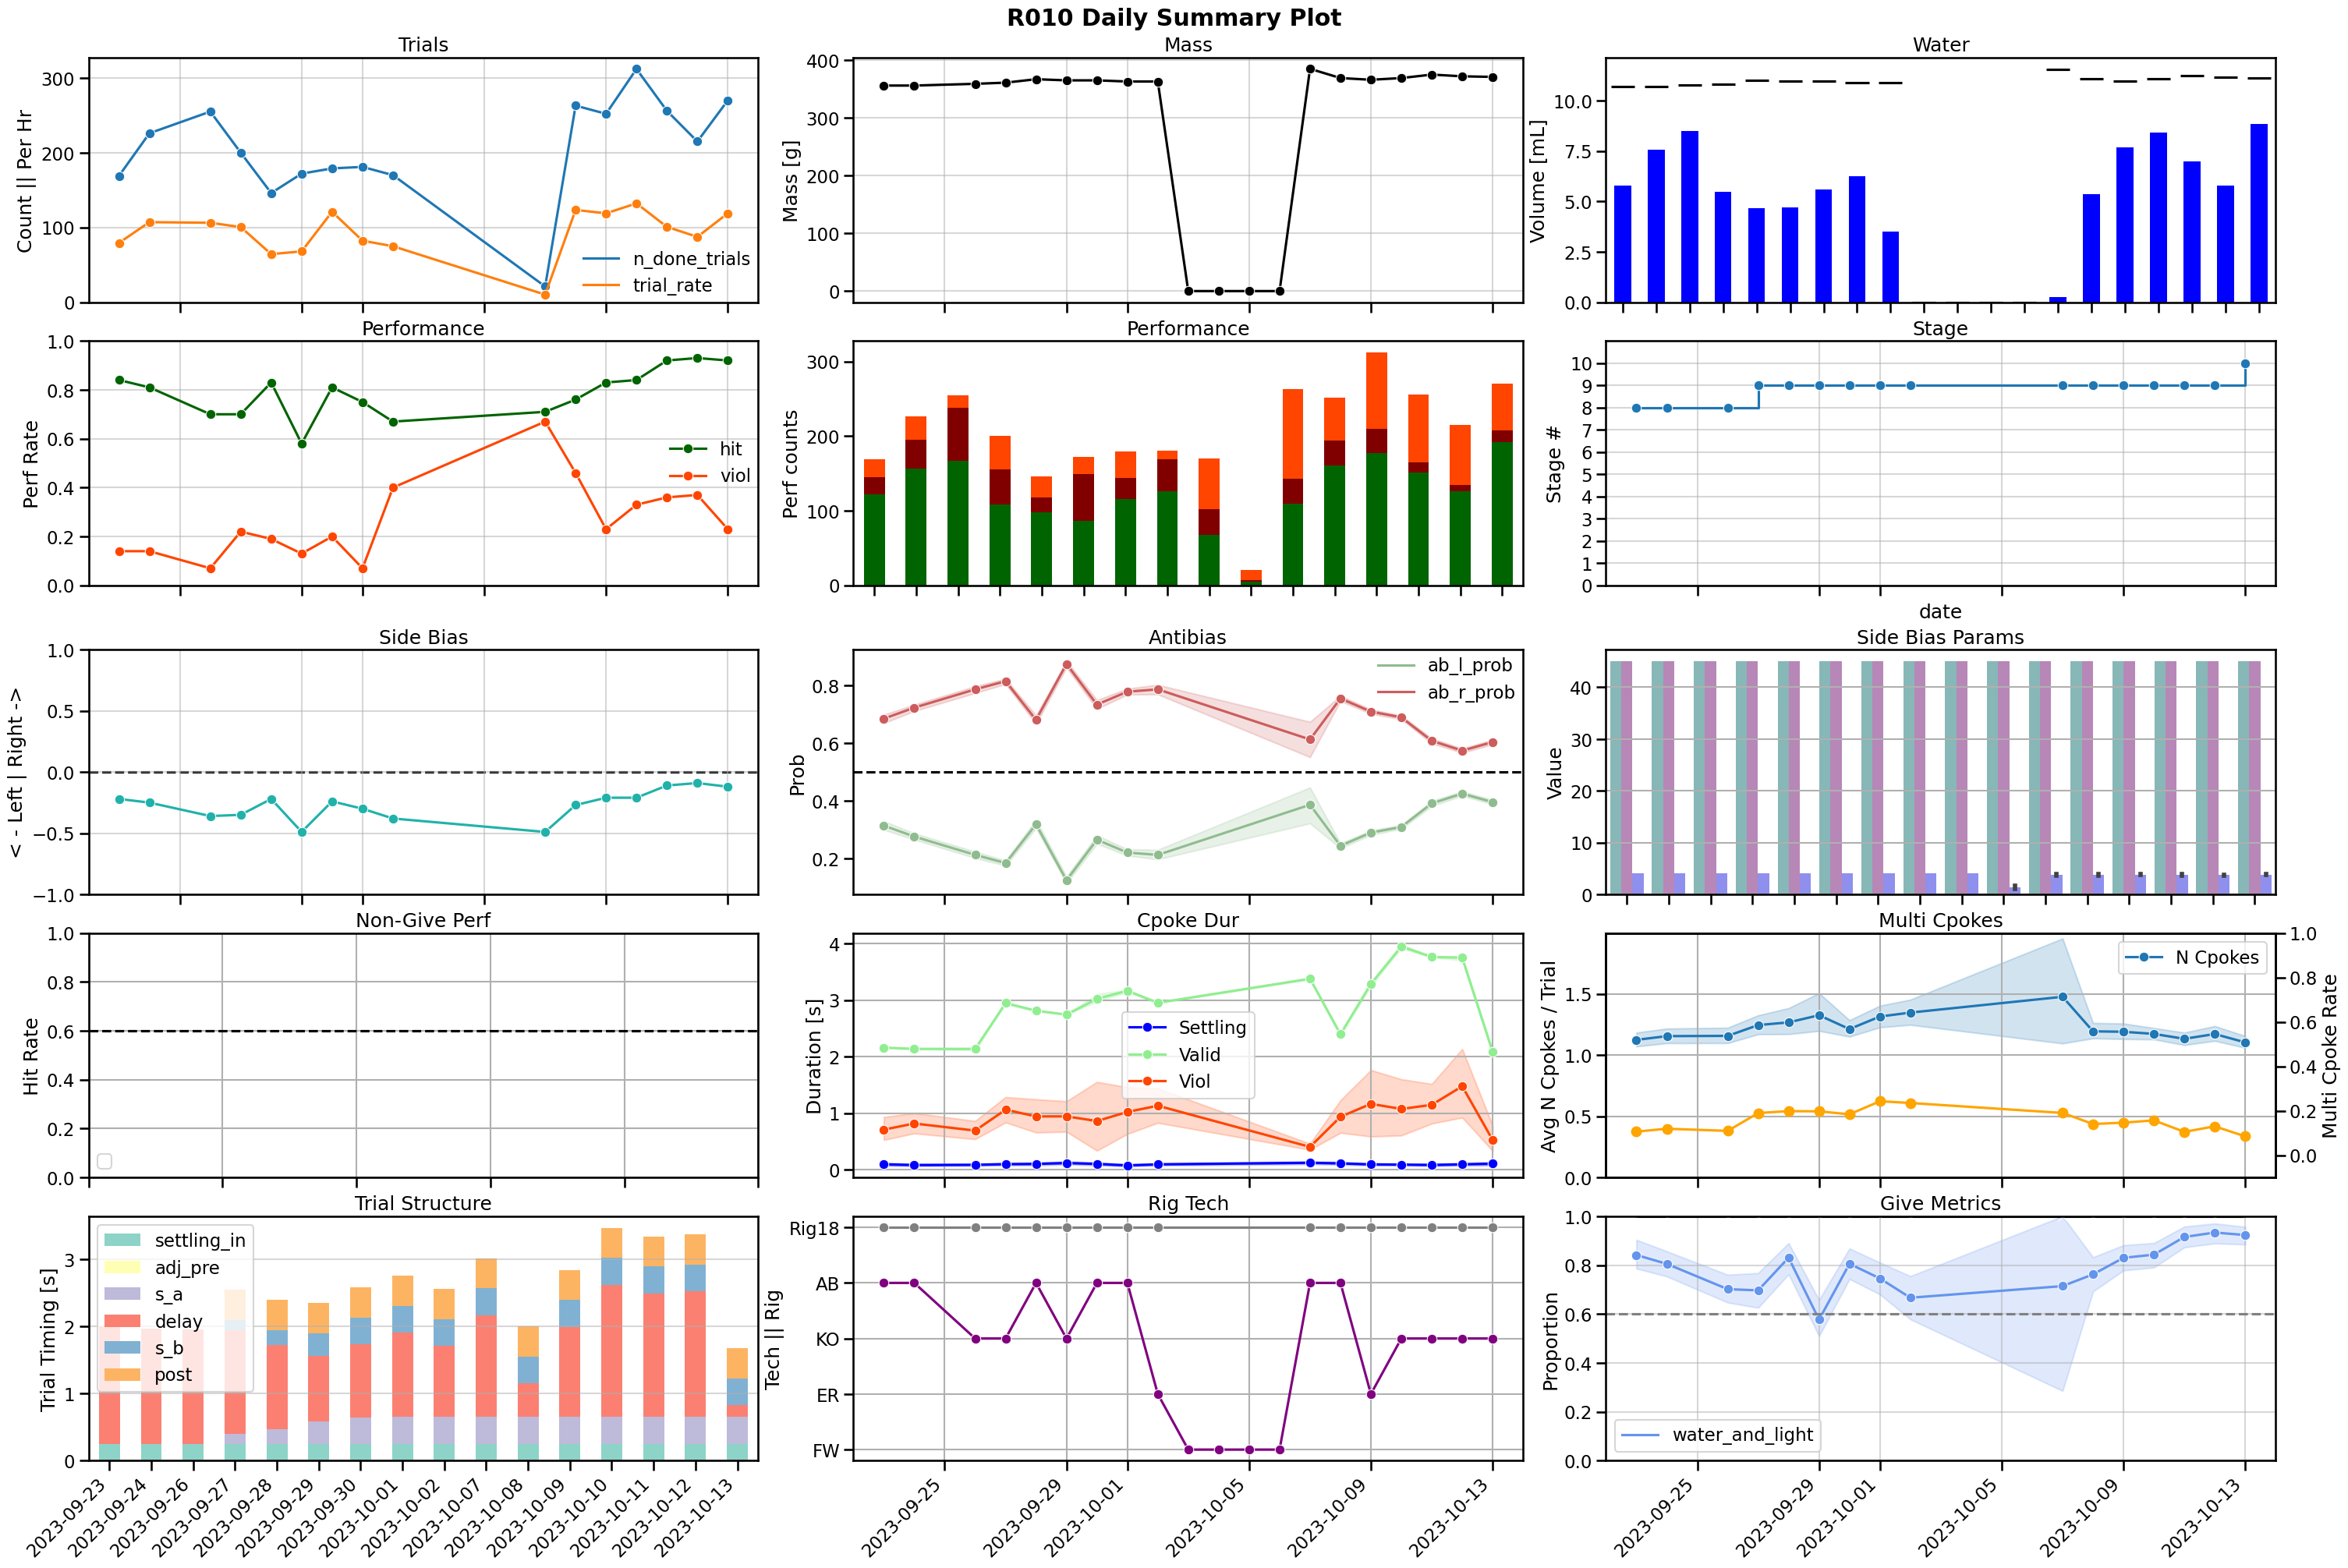

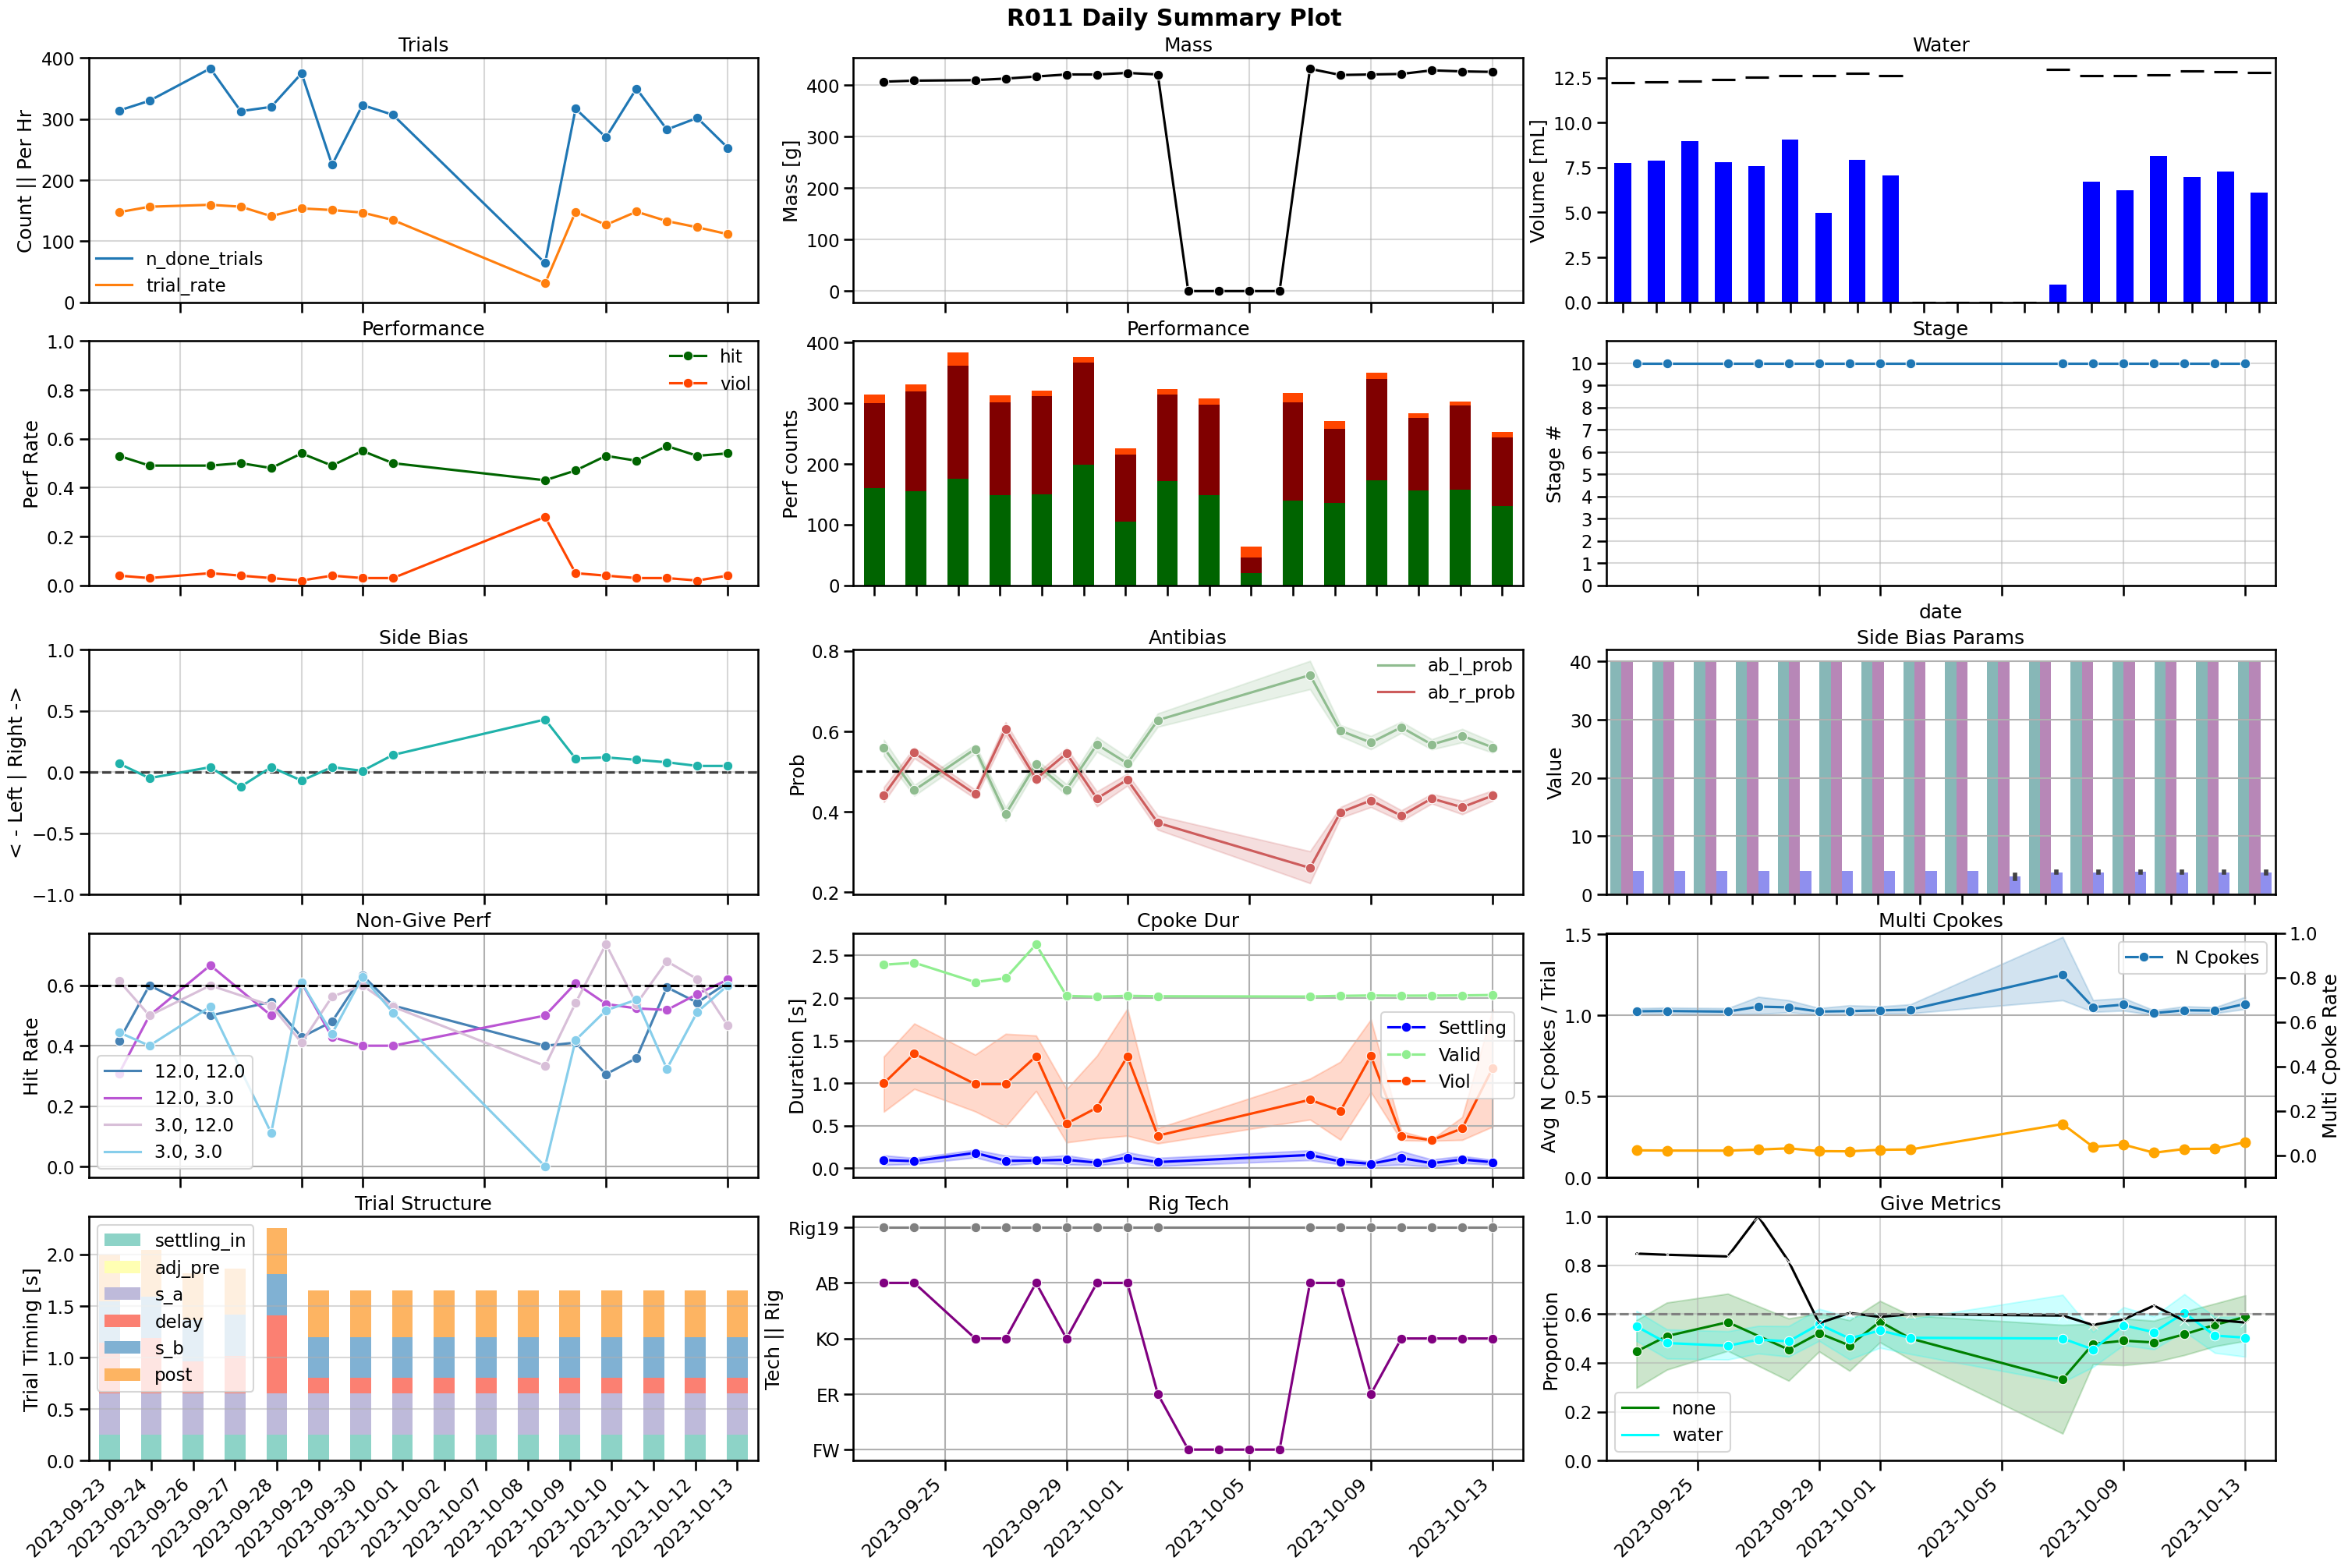

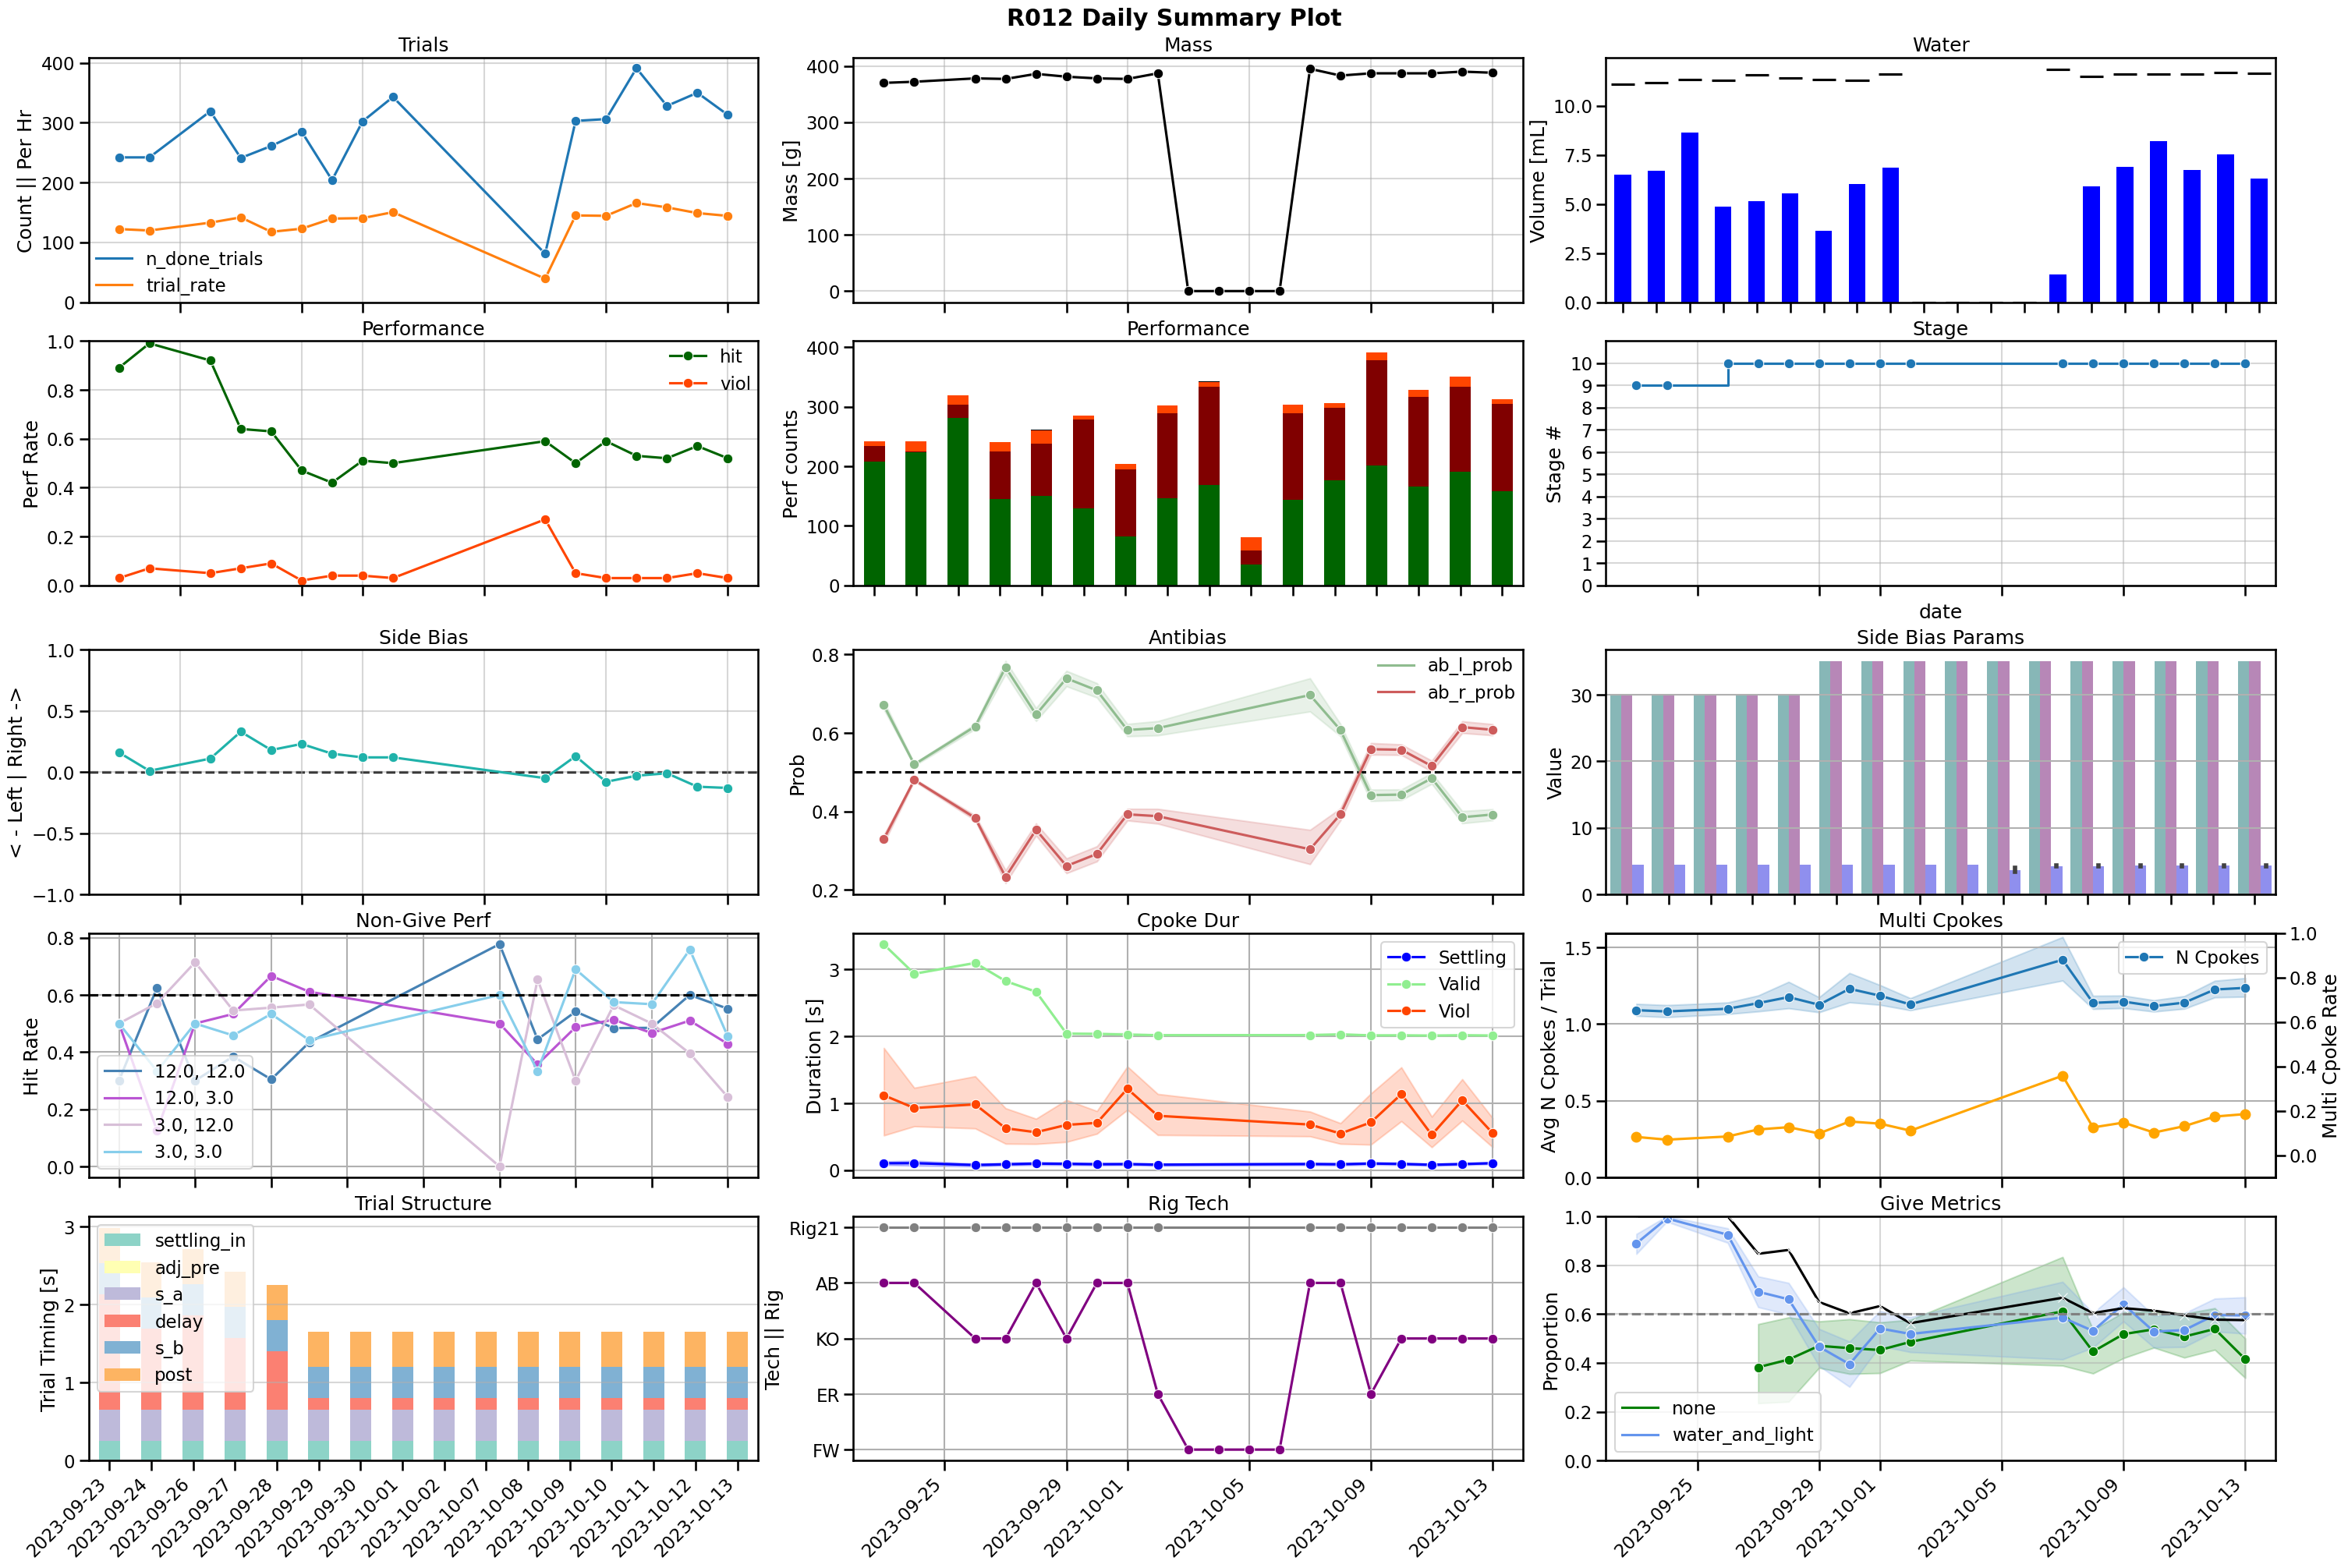

In [13]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [14]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R010_2023-10-09_day_summary
['s_a', 's_b']
making R011_2023-10-09_day_summary
['s_b', 'go']
making R012_2023-10-09_day_summary
['s_a', 's_b', 'go']
making R010_2023-10-10_day_summary
['s_a', 'delay', 's_b']
making R011_2023-10-10_day_summary
['s_a']
making R012_2023-10-10_day_summary
['s_a', 's_b', 'go']
making R010_2023-10-11_day_summary
['s_a', 'delay', 's_b', 'post']
making R011_2023-10-11_day_summary
['s_a']
making R012_2023-10-11_day_summary
['s_a', 'go']
making R010_2023-10-12_day_summary
['s_a', 'delay', 's_b']
making R011_2023-10-12_day_summary
['s_a']
making R012_2023-10-12_day_summary
['s_a', 's_b', 'post', 'go']
making R010_2023-10-13_day_summary
['s_a', 's_b', 'post']
making R011_2023-10-13_day_summary
['s_a', 'go']
making R012_2023-10-13_day_summary
['s_a', 's_b']
